# Libraries

In [ ]:
# Import library
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# NLP

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")

In [ ]:
df

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


##Pre - Processing

In [ ]:
df = df.drop(["following","followers","actions","is_retweet","location","Unnamed: 7"],axis=1)

In [ ]:
df

,Tweet,Type
0,Good Morning Love @LeeBrown_V,Quality
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam
2,Haven't been following the news but I understa...,Quality
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality
...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",Spam
14895,"They don't have to like you, and you don't hav...",Quality
14896,#Miami Graham Nash Live at Parker Playhouse #...,Spam
14897,@bethannhamilton is in the business of one-upp...,Quality


In [ ]:
df

,Tweet,Type
0,Good Morning Love @LeeBrown_V,Quality
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam
2,Haven't been following the news but I understa...,Quality
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality
...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",Spam
14895,"They don't have to like you, and you don't hav...",Quality
14896,#Miami Graham Nash Live at Parker Playhouse #...,Spam
14897,@bethannhamilton is in the business of one-upp...,Quality


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

##Removing Punctuations

In [ ]:
# Function to remove punctuations.
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

df["body_text_clean"] = df["Tweet"].apply(lambda x: remove_punc(x))

df.head()

,Tweet,Type,body_text_clean
0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrownV
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES
2,Haven't been following the news but I understa...,Quality,Havent been following the news but I understan...
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pictwittercomdy9q4ftLhZ What to do with paper ...
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,DidYouKnow ► Mahatma Gandhi made a brief visit...


##Tokenization

In [ ]:
import re

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens

df["body_text_tokenized"] = df["body_text_clean"].apply(lambda x: tokenize(x))

df.head()

,Tweet,Type,body_text_clean,body_text_tokenized
0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrownV,"[Good, Morning, Love, LeeBrownV]"
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES,"[realDonaldTrump, USNavy, RIP, TO, HEROES]"
2,Haven't been following the news but I understa...,Quality,Havent been following the news but I understan...,"[Havent, been, following, the, news, but, I, u..."
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pictwittercomdy9q4ftLhZ What to do with paper ...,"[pictwittercomdy9q4ftLhZ, What, to, do, with, ..."
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,DidYouKnow ► Mahatma Gandhi made a brief visit...,"[DidYouKnow, Mahatma, Gandhi, made, a, brief, ..."


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##Remove Stopwords

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]# to remove all stopwords
    return text

df["body_text_nonstop"] = df["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
df.head()

,Tweet,Type,body_text_clean,body_text_tokenized,body_text_nonstop
0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrownV,"[Good, Morning, Love, LeeBrownV]","[Good, Morning, Love, LeeBrownV]"
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES,"[realDonaldTrump, USNavy, RIP, TO, HEROES]","[realDonaldTrump, USNavy, RIP, TO, HEROES]"
2,Haven't been following the news but I understa...,Quality,Havent been following the news but I understan...,"[Havent, been, following, the, news, but, I, u...","[Havent, following, news, I, understand, EFF, ..."
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pictwittercomdy9q4ftLhZ What to do with paper ...,"[pictwittercomdy9q4ftLhZ, What, to, do, with, ...","[pictwittercomdy9q4ftLhZ, What, paper, scissor..."
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,DidYouKnow ► Mahatma Gandhi made a brief visit...,"[DidYouKnow, Mahatma, Gandhi, made, a, brief, ...","[DidYouKnow, Mahatma, Gandhi, made, brief, vis..."


##Stemming

In [ ]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

df["body_text_stemmed"] = df["body_text_nonstop"].apply(lambda x: stemming(x))
df.head()

,Tweet,Type,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrownV,"[Good, Morning, Love, LeeBrownV]","[Good, Morning, Love, LeeBrownV]","[good, morn, love, leebrownv]"
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES,"[realDonaldTrump, USNavy, RIP, TO, HEROES]","[realDonaldTrump, USNavy, RIP, TO, HEROES]","[realdonaldtrump, usnavi, rip, to, hero]"
2,Haven't been following the news but I understa...,Quality,Havent been following the news but I understan...,"[Havent, been, following, the, news, but, I, u...","[Havent, following, news, I, understand, EFF, ...","[havent, follow, news, i, understand, eff, dum..."
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pictwittercomdy9q4ftLhZ What to do with paper ...,"[pictwittercomdy9q4ftLhZ, What, to, do, with, ...","[pictwittercomdy9q4ftLhZ, What, paper, scissor...","[pictwittercomdy9q4ftlhz, what, paper, scissor..."
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,DidYouKnow ► Mahatma Gandhi made a brief visit...,"[DidYouKnow, Mahatma, Gandhi, made, a, brief, ...","[DidYouKnow, Mahatma, Gandhi, made, brief, vis...","[didyouknow, mahatma, gandhi, made, brief, vis..."


##Lemmatization

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

df["body_text_lemmatized"] = df["body_text_stemmed"].apply(lambda x: lemmatizer(x))
df.head()

,Tweet,Type,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrownV,"[Good, Morning, Love, LeeBrownV]","[Good, Morning, Love, LeeBrownV]","[good, morn, love, leebrownv]","[good, morn, love, leebrownv]"
1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES,"[realDonaldTrump, USNavy, RIP, TO, HEROES]","[realDonaldTrump, USNavy, RIP, TO, HEROES]","[realdonaldtrump, usnavi, rip, to, hero]","[realdonaldtrump, usnavi, rip, to, hero]"
2,Haven't been following the news but I understa...,Quality,Havent been following the news but I understan...,"[Havent, been, following, the, news, but, I, u...","[Havent, following, news, I, understand, EFF, ...","[havent, follow, news, i, understand, eff, dum...","[havent, follow, news, i, understand, eff, dum..."
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,Quality,pictwittercomdy9q4ftLhZ What to do with paper ...,"[pictwittercomdy9q4ftLhZ, What, to, do, with, ...","[pictwittercomdy9q4ftLhZ, What, paper, scissor...","[pictwittercomdy9q4ftlhz, what, paper, scissor...","[pictwittercomdy9q4ftlhz, what, paper, scissor..."
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,Quality,DidYouKnow ► Mahatma Gandhi made a brief visit...,"[DidYouKnow, Mahatma, Gandhi, made, a, brief, ...","[DidYouKnow, Mahatma, Gandhi, made, brief, vis...","[didyouknow, mahatma, gandhi, made, brief, vis...","[didyouknow, mahatma, gandhi, made, brief, vis..."


##Data Saving - Pre Processed

In [ ]:
df.to_csv("pre_processed_data.csv", sep=',')

In [ ]:
import pandas as pd
import re
import string
import nltk

data = pd.read_csv("pre_processed_data.csv", sep=',')

In [ ]:
data

,Unnamed: 0,Tweet,Type,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrownV,"['Good', 'Morning', 'Love', 'LeeBrownV']","['Good', 'Morning', 'Love', 'LeeBrownV']","['good', 'morn', 'love', 'leebrownv']","['good', 'morn', 'love', 'leebrownv']"
1,1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES,"['realDonaldTrump', 'USNavy', 'RIP', 'TO', 'HEROES']","['realDonaldTrump', 'USNavy', 'RIP', 'TO', 'HEROES']","['realdonaldtrump', 'usnavi', 'rip', 'to', 'hero']","['realdonaldtrump', 'usnavi', 'rip', 'to', 'hero']"
2,2,Haven't been following the news but I understand #EFF was doing the dumbest things,Quality,Havent been following the news but I understand EFF was doing the dumbest things,"['Havent', 'been', 'following', 'the', 'news', 'but', 'I', 'understand', 'EFF', 'was', 'doing', ...","['Havent', 'following', 'news', 'I', 'understand', 'EFF', 'dumbest', 'things']","['havent', 'follow', 'news', 'i', 'understand', 'eff', 'dumbest', 'thing']","['havent', 'follow', 'news', 'i', 'understand', 'eff', 'dumbest', 'thing']"
3,3,pic.twitter.com/dy9q4ftLhZ What to do with paper scissors and glue http://paperlandmarks.com/pro...,Quality,pictwittercomdy9q4ftLhZ What to do with paper scissors and glue httppaperlandmarkscomproductthep...,"['pictwittercomdy9q4ftLhZ', 'What', 'to', 'do', 'with', 'paper', 'scissors', 'and', 'glue', 'htt...","['pictwittercomdy9q4ftLhZ', 'What', 'paper', 'scissors', 'glue', 'httppaperlandmarkscomproductth...","['pictwittercomdy9q4ftlhz', 'what', 'paper', 'scissor', 'glue', 'httppaperlandmarkscomproductthe...","['pictwittercomdy9q4ftlhz', 'what', 'paper', 'scissor', 'glue', 'httppaperlandmarkscomproductthe..."
4,4,#DidYouKnow ► Mahatma Gandhi made a brief visit to lecture in #Nottingham on 17 October 1931 [@M...,Quality,DidYouKnow ► Mahatma Gandhi made a brief visit to lecture in Nottingham on 17 October 1931 Mumbl...,"['DidYouKnow', 'Mahatma', 'Gandhi', 'made', 'a', 'brief', 'visit', 'to', 'lecture', 'in', 'Notti...","['DidYouKnow', 'Mahatma', 'Gandhi', 'made', 'brief', 'visit', 'lecture', 'Nottingham', '17', 'Oc...","['didyouknow', 'mahatma', 'gandhi', 'made', 'brief', 'visit', 'lectur', 'nottingham', '17', 'oct...","['didyouknow', 'mahatma', 'gandhi', 'made', 'brief', 'visit', 'lectur', 'nottingham', '17', 'oct..."
...,...,...,...,...,...,...,...,...
14894,14894,"#AllWentWrongWhen I told my hair stylist to ""go nuts"".",Spam,AllWentWrongWhen I told my hair stylist to go nuts,"['AllWentWrongWhen', 'I', 'told', 'my', 'hair', 'stylist', 'to', 'go', 'nuts']","['AllWentWrongWhen', 'I', 'told', 'hair', 'stylist', 'go', 'nuts']","['allwentwrongwhen', 'i', 'told', 'hair', 'stylist', 'go', 'nut']","['allwentwrongwhen', 'i', 'told', 'hair', 'stylist', 'go', 'nut']"
14895,14895,"They don't have to like you, and you don't have to care.",Quality,They dont have to like you and you dont have to care,"['They', 'dont', 'have', 'to', 'like', 'you', 'and', 'you', 'dont', 'have', 'to', 'care']","['They', 'dont', 'like', 'dont', 'care']","['they', 'dont', 'like', 'dont', 'care']","['they', 'dont', 'like', 'dont', 'care']"
14896,14896,#Miami Graham Nash Live at Parker Playhouse #local,Spam,Miami Graham Nash Live at Parker Playhouse local,"['Miami', 'Graham', 'Nash', 'Live', 'at', 'Parker', 'Playhouse', 'local']","['Miami', 'Graham', 'Nash', 'Live', 'Parker', 'Playhouse', 'local']","['miami', 'graham', 'nash', 'live', 'parker', 'playhous', 'local']","['miami', 'graham', 'nash', 'live', 'parker', 'playhous', 'local']"
14897,14897,@bethannhamilton is in the business of one-upping me and she is very good at it.,Quality,bethannhamilton is in the business of oneupping me and she is very good at it,"['bethannhamilton', 'is', 'in', 'the', 'business', 'of', 'oneupping', 'me', 'and', 'she', 'is', ...","['bethannhamilton', 'business', 'oneupping', 'good']","['bethannhamilton', 'busi', 'oneup', 'good']","['bet

##Apply Count Vectorizer

1. Convert the text into lower case
2. Remove punctuations
3. Split the text into tokens
4. Remove all stop words
5. Stems each word in the text using the porter stemmer algorithm

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

1. We are using Count vectorizer to transform the text data into a matrix of token counts.
2. The function, get_feature_names_out method return the list of feature names(tokens) in the order they appear in the matrix. These feature names represent the vocabolary of the CountVectorizer model from the input data

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(analyzer=clean_text)
x_count = count.fit_transform(data["Tweet"])

x_count.shape
count.get_feature_names_out()

array(['', '0', '000', ..., 'ｊｅｔ', 'ｎｏｔ', 'ｓｔｒｅａｍ'], dtype=object)

In [ ]:
x_count_df = pd.DataFrame(x_count.toarray(), columns=count.get_feature_names_out())
x_count_df.head(10)

,,0,000,000000,0000ampictwittercomenr5wmejyn,0005,002,003share,005,0056,...,티파챗pictwittercomrhkf05rsid,화양연화pt1,화양연화pt2,화양연화youngforev,ｃｌｏｓｅｒ,ｃｏｍｅ,ｄｏ,ｊｅｔ,ｎｏｔ,ｓｔｒｅａｍ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


####Vectorize Raw Data:

##N Grams

##Apply CountVectorizer(N-Grams)

Transform the pre-processed text data into a matrix of bigram token counts.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['Tweet'])
print(X_counts.shape)
print(ngram_vect.get_feature_names_out())

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:544: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


(14899, 32599)
['' '0' '000' ... 'ｊｅｔ' 'ｎｏｔ' 'ｓｔｒｅａｍ']


In [ ]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names_out())
X_counts_df.head(10)

,,0,000,000000,0000ampictwittercomenr5wmejyn,0005,002,003share,005,0056,...,티파챗pictwittercomrhkf05rsid,화양연화pt1,화양연화pt2,화양연화youngforev,ｃｌｏｓｅｒ,ｃｏｍｅ,ｄｏ,ｊｅｔ,ｎｏｔ,ｓｔｒｅａｍ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##2. TF - IDF

##Apply TF - IDFvectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['Tweet'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(14899, 32599)
['' '0' '000' ... 'ｊｅｔ' 'ｎｏｔ' 'ｓｔｒｅａｍ']


In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
X_tfidf_df.head(10)

,,0,000,000000,0000ampictwittercomenr5wmejyn,0005,002,003share,005,0056,...,티파챗pictwittercomrhkf05rsid,화양연화pt1,화양연화pt2,화양연화youngforev,ｃｌｏｓｅｒ,ｃｏｍｅ,ｄｏ,ｊｅｔ,ｎｏｔ,ｓｔｒｅａｍ
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.328324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

                   0  000  000000  0000ampictwittercomenr5wmejyn  0005  002  \
0      0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
1      0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
2      0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
3      0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
4      0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
...         ...  ...  ...     ...                            ...   ...  ...   
14894  0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
14895  0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
14896  0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
14897  0.000000  0.0  0.0     0.0                            0.0   0.0  0.0   
14898  0.169263  0.0  0.0     0.0                            0.0   0.0  0.0   

       003share  005  0056  ...  티파챗pictwittercomrh

##Feature Engineering: Feature Creation

In [ ]:
import pandas as pd

data = pd.read_csv("pre_processed_data.csv", sep=',')

In [ ]:
data

,Unnamed: 0,Tweet,Type,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrownV,"['Good', 'Morning', 'Love', 'LeeBrownV']","['Good', 'Morning', 'Love', 'LeeBrownV']","['good', 'morn', 'love', 'leebrownv']","['good', 'morn', 'love', 'leebrownv']"
1,1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES,"['realDonaldTrump', 'USNavy', 'RIP', 'TO', 'HEROES']","['realDonaldTrump', 'USNavy', 'RIP', 'TO', 'HEROES']","['realdonaldtrump', 'usnavi', 'rip', 'to', 'hero']","['realdonaldtrump', 'usnavi', 'rip', 'to', 'hero']"
2,2,Haven't been following the news but I understand #EFF was doing the dumbest things,Quality,Havent been following the news but I understand EFF was doing the dumbest things,"['Havent', 'been', 'following', 'the', 'news', 'but', 'I', 'understand', 'EFF', 'was', 'doing', ...","['Havent', 'following', 'news', 'I', 'understand', 'EFF', 'dumbest', 'things']","['havent', 'follow', 'news', 'i', 'understand', 'eff', 'dumbest', 'thing']","['havent', 'follow', 'news', 'i', 'understand', 'eff', 'dumbest', 'thing']"
3,3,pic.twitter.com/dy9q4ftLhZ What to do with paper scissors and glue http://paperlandmarks.com/pro...,Quality,pictwittercomdy9q4ftLhZ What to do with paper scissors and glue httppaperlandmarkscomproductthep...,"['pictwittercomdy9q4ftLhZ', 'What', 'to', 'do', 'with', 'paper', 'scissors', 'and', 'glue', 'htt...","['pictwittercomdy9q4ftLhZ', 'What', 'paper', 'scissors', 'glue', 'httppaperlandmarkscomproductth...","['pictwittercomdy9q4ftlhz', 'what', 'paper', 'scissor', 'glue', 'httppaperlandmarkscomproductthe...","['pictwittercomdy9q4ftlhz', 'what', 'paper', 'scissor', 'glue', 'httppaperlandmarkscomproductthe..."
4,4,#DidYouKnow ► Mahatma Gandhi made a brief visit to lecture in #Nottingham on 17 October 1931 [@M...,Quality,DidYouKnow ► Mahatma Gandhi made a brief visit to lecture in Nottingham on 17 October 1931 Mumbl...,"['DidYouKnow', 'Mahatma', 'Gandhi', 'made', 'a', 'brief', 'visit', 'to', 'lecture', 'in', 'Notti...","['DidYouKnow', 'Mahatma', 'Gandhi', 'made', 'brief', 'visit', 'lecture', 'Nottingham', '17', 'Oc...","['didyouknow', 'mahatma', 'gandhi', 'made', 'brief', 'visit', 'lectur', 'nottingham', '17', 'oct...","['didyouknow', 'mahatma', 'gandhi', 'made', 'brief', 'visit', 'lectur', 'nottingham', '17', 'oct..."
...,...,...,...,...,...,...,...,...
14894,14894,"#AllWentWrongWhen I told my hair stylist to ""go nuts"".",Spam,AllWentWrongWhen I told my hair stylist to go nuts,"['AllWentWrongWhen', 'I', 'told', 'my', 'hair', 'stylist', 'to', 'go', 'nuts']","['AllWentWrongWhen', 'I', 'told', 'hair', 'stylist', 'go', 'nuts']","['allwentwrongwhen', 'i', 'told', 'hair', 'stylist', 'go', 'nut']","['allwentwrongwhen', 'i', 'told', 'hair', 'stylist', 'go', 'nut']"
14895,14895,"They don't have to like you, and you don't have to care.",Quality,They dont have to like you and you dont have to care,"['They', 'dont', 'have', 'to', 'like', 'you', 'and', 'you', 'dont', 'have', 'to', 'care']","['They', 'dont', 'like', 'dont', 'care']","['they', 'dont', 'like', 'dont', 'care']","['they', 'dont', 'like', 'dont', 'care']"
14896,14896,#Miami Graham Nash Live at Parker Playhouse #local,Spam,Miami Graham Nash Live at Parker Playhouse local,"['Miami', 'Graham', 'Nash', 'Live', 'at', 'Parker', 'Playhouse', 'local']","['Miami', 'Graham', 'Nash', 'Live', 'Parker', 'Playhouse', 'local']","['miami', 'graham', 'nash', 'live', 'parker', 'playhous', 'local']","['miami', 'graham', 'nash', 'live', 'parker', 'playhous', 'local']"
14897,14897,@bethannhamilton is in the business of one-upping me and she is very good at it.,Quality,bethannhamilton is in the business of oneupping me and she is very good at it,"['bethannhamilton', 'is', 'in', 'the', 'business', 'of', 'oneupping', 'me', 'and', 'she', 'is', ...","['bethannhamilton', 'business', 'oneupping', 'good']","['bethannhamilton', 'busi', 'oneup', 'good']","['bet

##Create feature for text message length and % of punctuation in text

In [ ]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['Tweet'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['Tweet'].apply(lambda x: count_punct(x))

data.head()

,Unnamed: 0,Tweet,Type,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized,body_len,punct%
0,0,Good Morning Love @LeeBrown_V,Quality,Good Morning Love LeeBrownV,"['Good', 'Morning', 'Love', 'LeeBrownV']","['Good', 'Morning', 'Love', 'LeeBrownV']","['good', 'morn', 'love', 'leebrownv']","['good', 'morn', 'love', 'leebrownv']",26,7.7
1,1,'@realDonaldTrump @USNavy RIP TO HEROES',Spam,realDonaldTrump USNavy RIP TO HEROES,"['realDonaldTrump', 'USNavy', 'RIP', 'TO', 'HEROES']","['realDonaldTrump', 'USNavy', 'RIP', 'TO', 'HEROES']","['realdonaldtrump', 'usnavi', 'rip', 'to', 'hero']","['realdonaldtrump', 'usnavi', 'rip', 'to', 'hero']",36,11.1
2,2,Haven't been following the news but I understand #EFF was doing the dumbest things,Quality,Havent been following the news but I understand EFF was doing the dumbest things,"['Havent', 'been', 'following', 'the', 'news', 'but', 'I', 'understand', 'EFF', 'was', 'doing', ...","['Havent', 'following', 'news', 'I', 'understand', 'EFF', 'dumbest', 'things']","['havent', 'follow', 'news', 'i', 'understand', 'eff', 'dumbest', 'thing']","['havent', 'follow', 'news', 'i', 'understand', 'eff', 'dumbest', 'thing']",69,2.9
3,3,pic.twitter.com/dy9q4ftLhZ What to do with paper scissors and glue http://paperlandmarks.com/pro...,Quality,pictwittercomdy9q4ftLhZ What to do with paper scissors and glue httppaperlandmarkscomproductthep...,"['pictwittercomdy9q4ftLhZ', 'What', 'to', 'do', 'with', 'paper', 'scissors', 'and', 'glue', 'htt...","['pictwittercomdy9q4ftLhZ', 'What', 'paper', 'scissors', 'glue', 'httppaperlandmarkscomproductth...","['pictwittercomdy9q4ftlhz', 'what', 'paper', 'scissor', 'glue', 'httppaperlandmarkscomproductthe...","['pictwittercomdy9q4ftlhz', 'what', 'paper', 'scissor', 'glue', 'httppaperlandmarkscomproductthe...",138,10.9
4,4,#DidYouKnow ► Mahatma Gandhi made a brief visit to lecture in #Nottingham on 17 October 1931 [@M...,Quality,DidYouKnow ► Mahatma Gandhi made a brief visit to lecture in Nottingham on 17 October 1931 Mumbl...,"['DidYouKnow', 'Mahatma', 'Gandhi', 'made', 'a', 'brief', 'visit', 'to', 'lecture', 'in', 'Notti...","['DidYouKnow', 'Mahatma', 'Gandhi', 'made', 'brief', 'visit', 'lecture', 'Nottingham', '17', 'Oc...","['didyouknow', 'mahatma', 'gandhi', 'made', 'brief', 'visit', 'lectur', 'nottingham', '17', 'oct...","['didyouknow', 'mahatma', 'gandhi', 'made', 'brief', 'visit', 'lectur', 'nottingham', '17', 'oct...",92,5.4


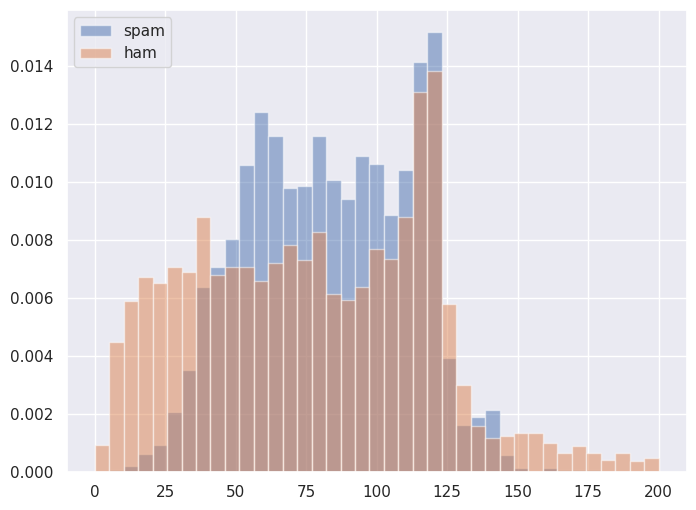

In [ ]:
import seaborn as sns
#Setting the size and grid for plotting
sns.set(rc= {"figure.figsize": (8, 6)})

bins = np.linspace(0, 200, 40)

plt.hist(data[data['Type']=='Spam']['body_len'], bins, alpha=0.5, density=True, label='spam')
plt.hist(data[data['Type']=='Quality']['body_len'], bins, alpha=0.5, density=True, label='ham')
plt.legend(loc='upper left')
plt.show()

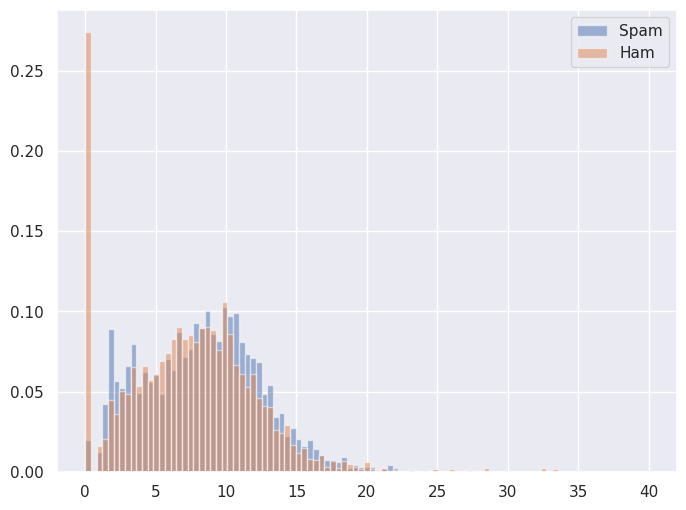

In [ ]:
bins = np.linspace(0, 40, 100)

plt.hist(data[data['Type']=='Spam']['punct%'], bins, alpha=0.5, density=True, label='Spam')
plt.hist(data[data['Type']=='Quality']['punct%'], bins, alpha=0.5, density=True, label='Ham')
plt.legend(loc='upper right')
plt.show()

##Split into train/test

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn import metrics

X = data.body_text_clean
y = data.Type
print(X.shape)
print(y.shape)

(14899,)
(14899,)


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11174,)
(3725,)
(11174,)
(3725,)


##Vectorize text

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [ ]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

# examine the document-term matrix
X_train_dtm

<11174x30785 sparse matrix of type '<class 'numpy.int64'>'
	with 126337 stored elements in Compressed Sparse Row format>

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<3725x30785 sparse matrix of type '<class 'numpy.int64'>'
	with 34747 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<11174x30785 sparse matrix of type '<class 'numpy.float64'>'
	with 126337 stored elements in Compressed Sparse Row format>

# Models

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
spam_classifier = DecisionTreeClassifier()
spam_classifier.fit(X_train_dtm, y_train)
# Use the classifier for predictions
predictions = spam_classifier.predict(X_test_dtm)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[1300  516]
 [ 595 1314]]
0.701744966442953
              precision    recall  f1-score   support

     Quality       0.69      0.72      0.70      1816
        Spam       0.72      0.69      0.70      1909

    accuracy                           0.70      3725
   macro avg       0.70      0.70      0.70      3725
weighted avg       0.70      0.70      0.70      3725



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

spam_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
spam_classifier.fit(X_train_dtm, y_train)
# Use the classifier for predictions
predictions = spam_classifier.predict(X_test_dtm)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[1554  262]
 [ 688 1221]]
0.7449664429530202
              precision    recall  f1-score   support

     Quality       0.69      0.86      0.77      1816
        Spam       0.82      0.64      0.72      1909

    accuracy                           0.74      3725
   macro avg       0.76      0.75      0.74      3725
weighted avg       0.76      0.74      0.74      3725



Multinomial Naive Bayers

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

%time nb.fit(X_train_dtm, y_train)

y_pred_class = nb.predict(X_test_dtm)
print(y_pred_class)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

print(metrics.confusion_matrix(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class))

CPU times: user 22.4 ms, sys: 1.83 ms, total: 24.2 ms
Wall time: 24.2 ms
['Spam' 'Spam' 'Spam' ... 'Spam' 'Quality' 'Quality']
0.7865771812080536
[[1530  286]
 [ 509 1400]]
              precision    recall  f1-score   support

     Quality       0.75      0.84      0.79      1816
        Spam       0.83      0.73      0.78      1909

    accuracy                           0.79      3725
   macro avg       0.79      0.79      0.79      3725
weighted avg       0.79      0.79      0.79      3725



Logistic Regression normal and probabilistic

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

%time logreg.fit(X_train_dtm, y_train)

y_pred_class = logreg.predict(X_test_dtm)

print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.classification_report(y_test, y_pred_class))

y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]

print(metrics.roc_auc_score(y_test, y_pred_prob))

CPU times: user 406 ms, sys: 300 ms, total: 706 ms
Wall time: 373 ms
0.781476510067114
              precision    recall  f1-score   support

     Quality       0.73      0.87      0.80      1816
        Spam       0.85      0.69      0.77      1909

    accuracy                           0.78      3725
   macro avg       0.79      0.78      0.78      3725
weighted avg       0.79      0.78      0.78      3725

0.49663243089192627


SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_dtm, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_dtm)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

0.7702013422818792
              precision    recall  f1-score   support

     Quality       0.72      0.86      0.78      1816
        Spam       0.84      0.69      0.75      1909

    accuracy                           0.77      3725
   macro avg       0.78      0.77      0.77      3725
weighted avg       0.78      0.77      0.77      3725



# Real Time data analysis

In [ ]:
import tweepy

#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAHbJhgEAAAAAb0Wbujbwy1VtUOx9Ytmd4YG5YtA%3DhOfhBfhiqdue61IidFzhFwESIqm8FqswWbHNtwDjwWgXbm3QV7')

# Get tweets that contain the hashtag #petday
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english
query = '#CSKvsRR  lang:En'
tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100)

l=[]

for tweet in tweets.data:
    print(tweet.text)
    l.append(tweet.text)
    print("\n")

RT @Harish_NS149: Thala Dhoni’s 200 IPL Match as the Captain for #CSK

#CSKvsRR #IPL2023 #Thala200 #Yellove https://t.co/XUaj3GGFKv


RT @sexycricketshot: Angry MSD 🔥

CSK vs RR always remind me of this moment. Rarest scene ever in Ms Dhoni's career. #CSKvsRR
https://t.co/…


RT @TheDhoniEra: MS Dhoni felicitated with a momento on his 200*th IPL match as captain 😍

@MSDhoni #IPL2023 #CSKvsRR https://t.co/vkTdGzcy…


RT @NetMeds: #ContestAlert🏏- 250 lucky winners will win a FREE 6-month Netmeds First membership.* 

Rules: 
- Comment with the right answer…


RT @Harish_NS149: Thala Dhoni’s 200 IPL Match as the Captain for #CSK

#CSKvsRR #IPL2023 #Thala200 #Yellove https://t.co/XUaj3GGFKv


RT @spyankit07: @NetMeds Ans-B) Blood group O  #ContestAlert🏏 
#CSKvsRR  @ritujha89646416 @wani_aakil @GauravSuradkar @NetMeds


@NipponIndia Path - A

@NipponIndia
#BlobbysFanFrenzy #NipponPaintIPL2023 #NipponPaint #NipponPaintIndia #contest #contestalert #giveaway #contestgiveaway #CSK #IPL2023 #CSKv

In [ ]:
l

['RT @Harish_NS149: Thala Dhoni’s 200 IPL Match as the Captain for #CSK\n\n#CSKvsRR #IPL2023 #Thala200 #Yellove https://t.co/XUaj3GGFKv',
 "RT @sexycricketshot: Angry MSD 🔥\n\nCSK vs RR always remind me of this moment. Rarest scene ever in Ms Dhoni's career. #CSKvsRR\nhttps://t.co/…",
 'RT @TheDhoniEra: MS Dhoni felicitated with a momento on his 200*th IPL match as captain 😍\n\n@MSDhoni #IPL2023 #CSKvsRR https://t.co/vkTdGzcy…',
 'RT @NetMeds: #ContestAlert🏏- 250 lucky winners will win a FREE 6-month Netmeds First membership.* \n\nRules: \n- Comment with the right answer…',
 'RT @Harish_NS149: Thala Dhoni’s 200 IPL Match as the Captain for #CSK\n\n#CSKvsRR #IPL2023 #Thala200 #Yellove https://t.co/XUaj3GGFKv',
 'RT @spyankit07: @NetMeds Ans-B) Blood group O  #ContestAlert🏏 \n#CSKvsRR  @ritujha89646416 @wani_aakil @GauravSuradkar @NetMeds',
 '@NipponIndia Path - A\n\n@NipponIndia\n#BlobbysFanFrenzy #NipponPaintIPL2023 #NipponPaint #NipponPaintIndia #contest #contestalert #giveaway #conte

In [ ]:
df = pd.DataFrame({'tweets':l})

In [ ]:
df

,tweets
0,RT @Harish_NS149: Thala Dhoni’s 200 IPL Match as the Captain for #CSK\n\n#CSKvsRR #IPL2023 #Thal...
1,RT @sexycricketshot: Angry MSD 🔥\n\nCSK vs RR always remind me of this moment. Rarest scene ever...
2,RT @TheDhoniEra: MS Dhoni felicitated with a momento on his 200*th IPL match as captain 😍\n\n@MS...
3,RT @NetMeds: #ContestAlert🏏- 250 lucky winners will win a FREE 6-month Netmeds First membership....
4,RT @Harish_NS149: Thala Dhoni’s 200 IPL Match as the Captain for #CSK\n\n#CSKvsRR #IPL2023 #Thal...
...,...
95,RT @akhilkautilya1: #SiddhiIdnani letest📸😍\n\n#Adi #ShahRukhKhan #SoppanaSundari #Rudhran #Keert...
96,#thala giving tips to #pathirana 🔥🔥🔥🔥🔥🔥🔥 #CSKvsRR #CSK #msd #MSDhoni𓃵 #ipl #IPL2023 #ThalapathyV...
97,RT @IamPoojaSingh2: Viral Video from Jaipur\n\nMuslims in India🇮🇳👇\nMaximum share for the punish...
98,RT @sexycricketshot: Angry MSD 🔥\n\nCSK vs RR always remind me of this moment. Rarest scene ever...


In [ ]:
df.describe()

,tweets
count,100
unique,64
top,"RT @Pratham_editz: My favourite #CSKvsRR moment, yours?\n\nhttps://t.co/8nhk0CLQJ2"
freq,9


In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_real = vect.transform(df['tweets'])
X_test_real

<100x30785 sparse matrix of type '<class 'numpy.int64'>'
	with 998 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

%time nb.fit(X_train_dtm, y_train)

y_pred_class = nb.predict(X_test_real)
print(y_pred_class)


CPU times: user 33.5 ms, sys: 0 ns, total: 33.5 ms
Wall time: 43 ms
['Spam' 'Spam' 'Spam' 'Quality' 'Spam' 'Spam' 'Quality' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Quality' 'Spam' 'Quality' 'Spam' 'Quality' 'Spam'
 'Spam' 'Spam' 'Quality' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Quality' 'Quality' 'Spam' 'Quality' 'Spam' 'Spam' 'Spam' 'Spam'
 'Quality' 'Quality' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Quality' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam'
 'Spam' 'Quality' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Quality' 'Spam'
 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Spam' 'Quality'
 'Spam' 'Spam' 'Spam' 'Spam' 'Quality' 'Spam' 'Quality' 'Spam' 'Spam'
 'Spam' 'Spam' 'Spam' 'Quality' 'Spam' 'Spam' 'Spam']
